In [16]:
from qiskit import QuantumCircuit, Aer
from qiskit.providers.aer import AerSimulator
import numpy as np
import matplotlib.pyplot as plt

In [9]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)


In [21]:
counts = AerSimulator(shots=1000).run(qc).result().get_counts()
counts


{'0': 498, '1': 502}

In [22]:
# Initialize IQ points list
iq_points = []

for outcome in counts:  # this orders it dependent on the outcome, not the counts
    frequency = counts[outcome]

    # Determine Gaussian parameters based on the outcome
    if outcome == '0':
        mean = [0, 0]
    else:
        mean = [3, 3]

    cov_matrix = [[1, 0], [0, 1]]

    # Sample IQ points for this outcome
    for _ in range(frequency):
        point = np.random.multivariate_normal(mean, cov_matrix)
        iq_points.append(point)

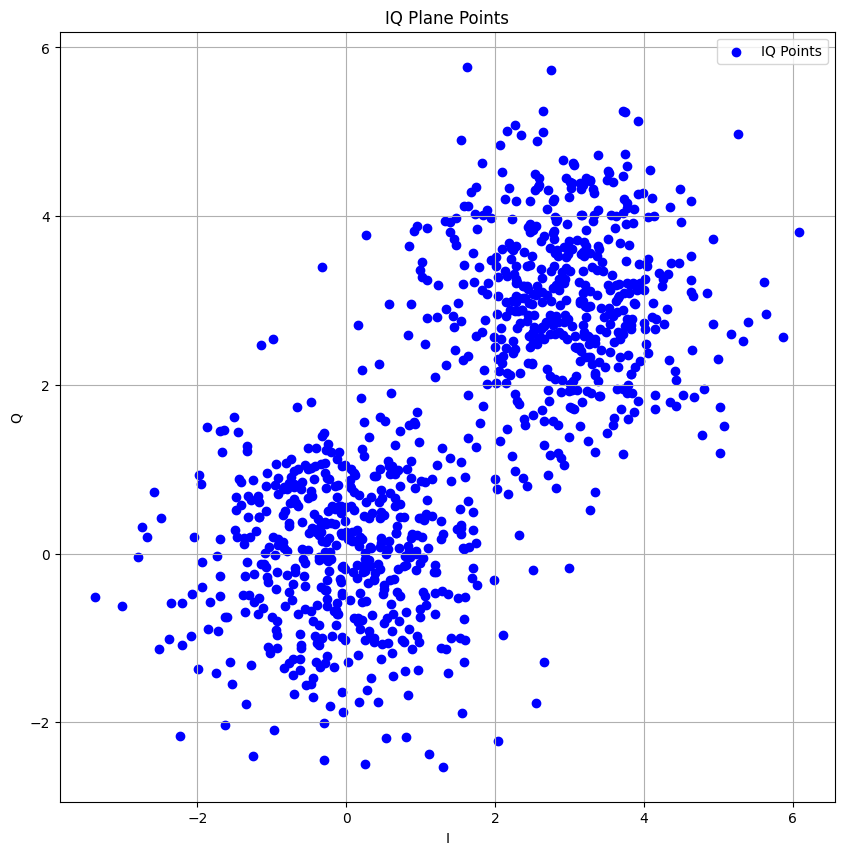

In [23]:
# Extract the I and Q components from the list of IQ points
i_values = [point[0] for point in iq_points]
q_values = [point[1] for point in iq_points]

# Create the plot
plt.figure(figsize=(10, 10))
plt.scatter(i_values, q_values, c='blue', label='IQ Points')

# Add axis labels and title
plt.xlabel("I")
plt.ylabel("Q")
plt.title("IQ Plane Points")

# Show grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()